<a href="https://colab.research.google.com/github/mohitraosatya/Quantum-Crypto-Enhancements/blob/main/Quantum_Secure_Cryptography_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycryptodome

import requests
import secrets
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.6 MB/s eta 0:00:00


In [2]:
def get_quantum_random_numbers(length=16):
    """
    Attempt to fetch quantum random numbers from the ANU QRNG API.
    If the API request fails or doesn't return a successful response,
    fall back to using the secrets module.
    Returns a list of integers (0-255) of the requested length.
    """
    url = f'https://qrng.anu.edu.au/API/jsonI.php?length={length}&type=uint8'
    try:
        response = requests.get(url, timeout=10)  # timeout to prevent long waits
        if response.status_code == 200:
            data = response.json()
            if data.get('success'):
                return data['data']
            else:
                print("QRNG API did not return a successful response. Using fallback.")
        else:
            print("Failed to fetch from QRNG API, status code:", response.status_code)
    except Exception as e:
        print("Exception encountered while fetching from QRNG API:", e)

    # Fallback: Use Python's cryptographically secure randomness
    print("Using fallback: secrets module for random numbers.")
    return [secrets.randbelow(256) for _ in range(length)]

# Example: Fetch 16 quantum random numbers for a 128-bit AES key
quantum_random_numbers = get_quantum_random_numbers(16)
print("Quantum Random Numbers:", quantum_random_numbers)

# Convert to bytes for key use
quantum_key = bytes(quantum_random_numbers)
print("Quantum AES Key (base64 encoded):", base64.b64encode(quantum_key).decode())


Quantum Random Numbers: [148, 203, 76, 206, 169, 187, 2, 217, 165, 80, 11, 82, 42, 145, 75, 126]
Quantum AES Key (base64 encoded): lMtMzqm7AtmlUAtSKpFLfg==


In [3]:
def aes_encrypt(plaintext, key):
    """
    Encrypt plaintext using AES (CBC mode) with the given key.
    Returns the IV and ciphertext (both as bytes).
    """
    cipher = AES.new(key, AES.MODE_CBC)  # Automatically generates a random IV
    ct_bytes = cipher.encrypt(pad(plaintext.encode('utf-8'), AES.block_size))
    return cipher.iv, ct_bytes

def aes_decrypt(iv, ciphertext, key):
    """
    Decrypt ciphertext using AES (CBC mode) with the given key and IV.
    Returns the plaintext string.
    """
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ciphertext), AES.block_size)
    return pt.decode('utf-8')

# Sample message to encrypt
message = "Hello, this is a quantum-enhanced encryption test!"

# Encrypt the message
iv, ciphertext = aes_encrypt(message, quantum_key)
encrypted_message = base64.b64encode(iv + ciphertext).decode()
print("Encrypted message (base64):", encrypted_message)

# Decrypt the message
decrypted_message = aes_decrypt(iv, ciphertext, quantum_key)
print("Decrypted message:", decrypted_message)


Encrypted message (base64): QvJKR0DlhtJzD1Mw8c9Rhd+xmwbBldZaJPvDaAXJFDulDn2QmXoKnk9Td3Qtembd+Ene56mtQ0mT578OSaU148RlbqHqznDtDlKeRvhVsN8=
Decrypted message: Hello, this is a quantum-enhanced encryption test!


Failed to fetch from QRNG API, status code: 500
Using fallback: secrets module for random numbers.


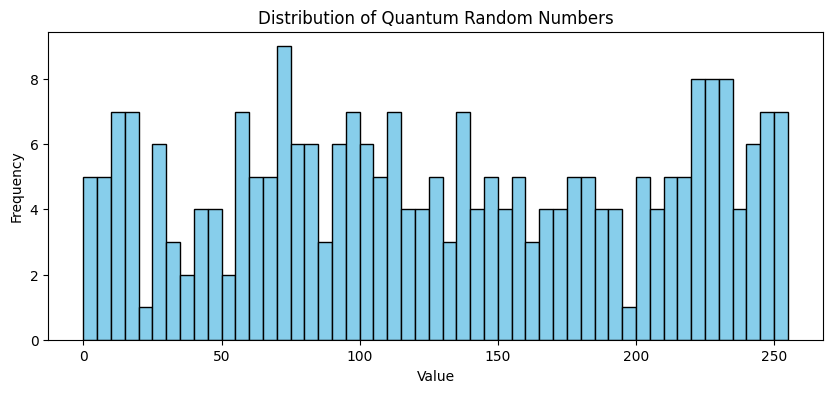

In [4]:
# For a simple visualization, fetch a larger batch of random numbers
quantum_random_numbers_large = get_quantum_random_numbers(256)

plt.figure(figsize=(10, 4))
plt.hist(quantum_random_numbers_large, bins=range(0, 257, 5), color='skyblue', edgecolor='black')
plt.title("Distribution of Quantum Random Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [5]:
import secrets
import hashlib

def simulate_pqc_kem():
    """
    Simulate a post-quantum key encapsulation mechanism (KEM) process.
    This dummy function represents the encapsulation/decapsulation process,
    and returns a simulated shared secret (32 bytes).

    In a real PQC KEM, the shared secret would be derived from a public key
    encryption scheme (e.g., a lattice-based algorithm). Here, we simply generate
    a random 32-byte secret to simulate this.
    """
    shared_secret = secrets.token_bytes(32)
    return shared_secret

# Simulate generating a PQC shared secret (as if from an encapsulation process)
simulated_shared_secret = simulate_pqc_kem()
print("Simulated PQC shared secret (hex):", simulated_shared_secret.hex())

# Fetch quantum randomness of equal length to the shared secret
quantum_random_bytes = bytes(get_quantum_random_numbers(len(simulated_shared_secret)))
print("Quantum random bytes (hex):", quantum_random_bytes.hex())

# Combine the simulated PQC shared secret with quantum randomness.
# We demonstrate two methods:

# 1. XOR the bytes together:
combined_key_xor = bytes(a ^ b for a, b in zip(simulated_shared_secret, quantum_random_bytes))
print("Combined key via XOR (hex):", combined_key_xor.hex())

# 2. Concatenate and hash them using SHA256 to produce a uniform 32-byte output:
combined_key_hash = hashlib.sha256(simulated_shared_secret + quantum_random_bytes).digest()
print("Combined key via SHA256 (hex):", combined_key_hash.hex())

# For AES encryption, we need a key of 16, 24, or 32 bytes.
# Here, we take the first 16 bytes of the hash-based combined key.
pqc_aes_key = combined_key_hash[:16]

# Encrypt and decrypt a sample message using the final quantum-enhanced PQC key.
iv_pqc, ciphertext_pqc = aes_encrypt(message, pqc_aes_key)
encrypted_message_pqc = base64.b64encode(iv_pqc + ciphertext_pqc).decode()
print("Encrypted message with quantum-enhanced PQC key (base64):", encrypted_message_pqc)

decrypted_message_pqc = aes_decrypt(iv_pqc, ciphertext_pqc, pqc_aes_key)
print("Decrypted message with quantum-enhanced PQC key:", decrypted_message_pqc)


Simulated PQC shared secret (hex): 38eefd0f5f8b7111230569ac5ac0602230b0a83cd9ee4e292856579b8a8346d2
Failed to fetch from QRNG API, status code: 500
Using fallback: secrets module for random numbers.
Quantum random bytes (hex): b6ae775f10a26d6c12ab60287548cab73c4b08ad06377c55da718e1909343da5
Combined key via XOR (hex): 8e408a504f291c7d31ae09842f88aa950cfba091dfd9327cf227d98283b77b77
Combined key via SHA256 (hex): 07e9fcf9ac8604d63efc41bc08f83013d51f8d2cf728011085c66fff2c2c7334
Encrypted message with quantum-enhanced PQC key (base64): vcVBL8bnW2Nu0zDSjr4+PsDet/KsPHNhWIy2wC2v4Z1MKpUo4ZD6Q1fhU0u8teZ6eCdpPEto+3dlBpkIckQA5wn9Ye06HuBOiAw2s5NbXJo=
Decrypted message with quantum-enhanced PQC key: Hello, this is a quantum-enhanced encryption test!
